Load necessary packages

In [1]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cmocean

plt.style.use("thesis")

Define annotation functions

In [2]:
def anno_tl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, t), xytext=(3, -3), textcoords="offset points", ha='left', va='top')
    return

def anno_tr(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (r, t), xytext=(-3, -3), textcoords="offset points", ha='right', va='top')
    return

Read in APE budget terms from files

In [3]:
APE_file = "gkb_stats/F1/APE.h5"
budget_file = "gkb_stats/F1/budgets.h5"

with h5py.File(APE_file,"r") as f:
    tii = f["tii"][()]
    A = f["A"][()]
    B = f["B"][()]
    Dp = f["Dp"][()]
    Fd = f["Fd"][()]
    M = f["M"][()]
    
with h5py.File(budget_file,"r") as f:
    t = f["t"][()]
    eps = f["epsM"][()] + f["epsP"][()]
    J = -f["J"][()]  # N.B. J defined in paper is -1* that stored in file

## Plot figure 6

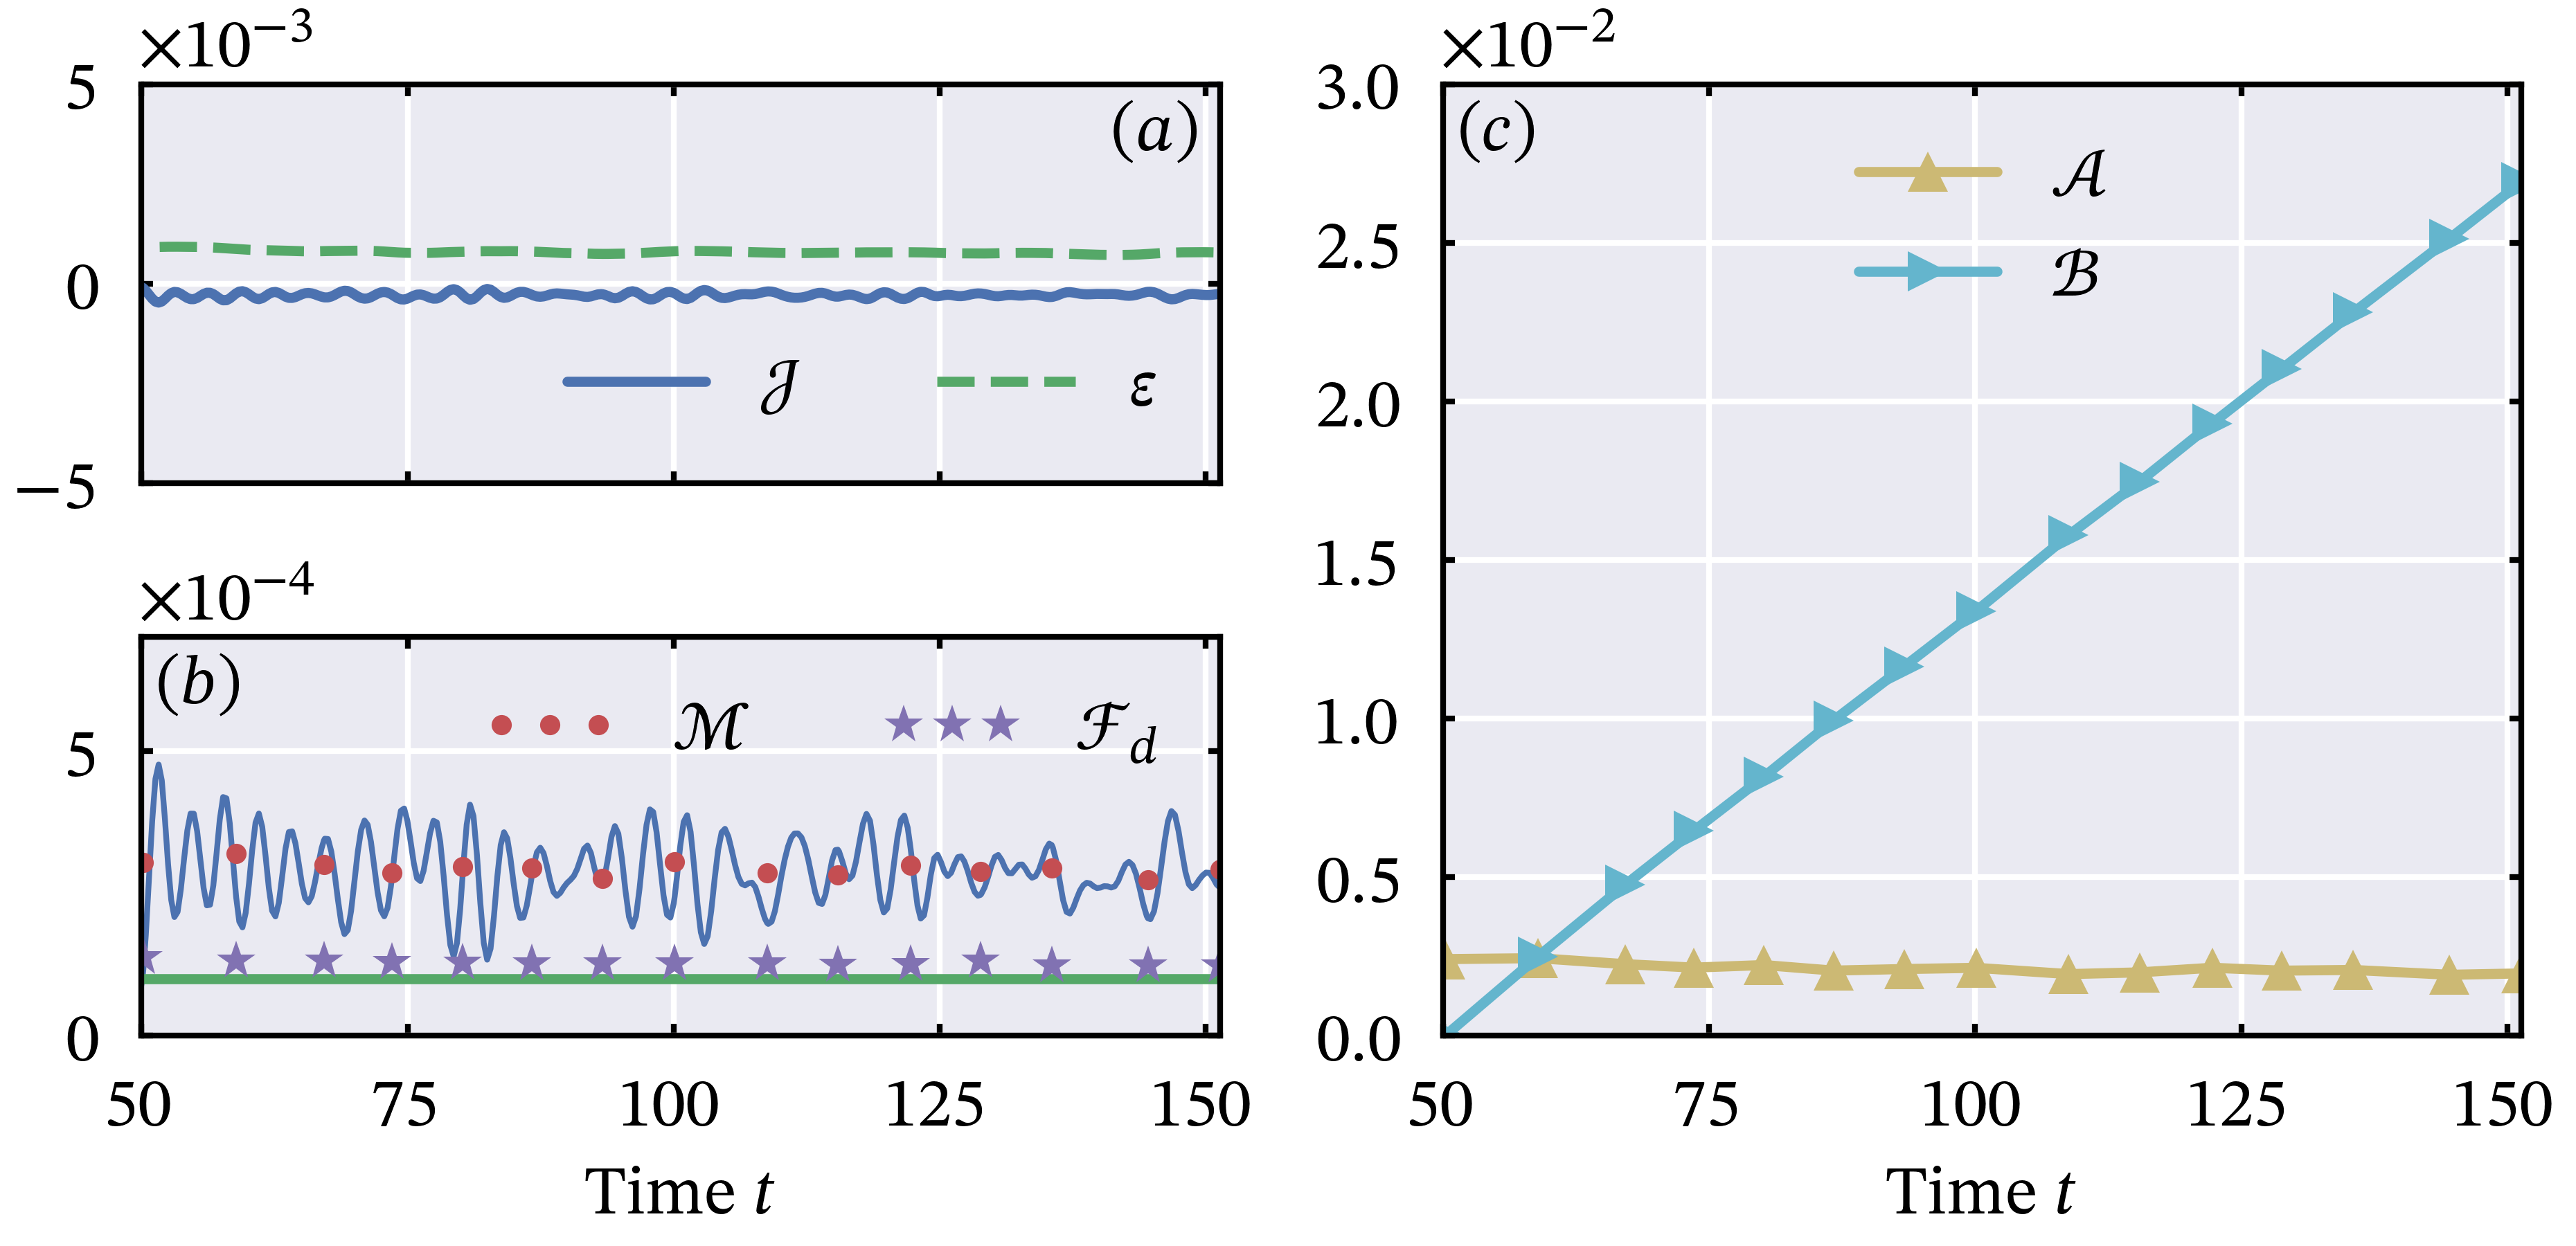

In [4]:
fig, axs = plt.subplots(2,2, sharex=True, figsize=(6.2,3.0))

gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[:, 1]:
    ax.remove()
axbig = fig.add_subplot(gs[:, 1])

axs[0,0].plot(t, J,color="C0", label = "$\mathcal{J}$")
axs[0,0].plot(t, eps, '--', color="C1", label = r"$\varepsilon$")
axs[0,0].legend(ncol=2, loc='lower right')
axs[0,0].set_ylim(-5e-3, 5e-3)
axs[1,0].plot(t, -J, color="C0", lw=1)
axs[1,0].plot(tii, Dp, color="C1")
axs[1,0].plot(tii, M,'.', color="C2", label="$\mathcal{M}$")
axs[1,0].plot(tii, Fd,'*', color="C3", label = "$\mathcal{F}_d$")
axs[1,0].set_ylim([0,7e-4])
for ax in axs[:,0]:
#     ax.grid(linestyle=':')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))#, useMathText=True)
axs[1,0].set_xlim([50,tii[-1]])
axs[1,0].set_xlabel("Time $t$")
axs[1,0].legend(ncol=2, numpoints=3, loc='upper right')

axbig.plot(tii, A, '-^', label="$\mathcal{A}$", color="C4")
axbig.plot(tii, B - B[0], '->', label="$\mathcal{B}$", color="C5")
# axbig.grid(linestyle=':')
axbig.set_xlim([50,tii[-1]])
axbig.set_xlabel("Time $t$")
axbig.set_ylim([0, 0.03])
axbig.ticklabel_format(style='sci', axis='y', scilimits=(0,0))#, useMathText=True)
axbig.legend(loc='upper center')

anno_tr(axs[0,0], "$(a)$")
anno_tl(axs[1,0], "$(b)$")
anno_tl(axbig, "$(c)$")

# fig.savefig("EPS/PE_budget_F1_J.eps")
# fig.savefig("PE_budget_F1_J.pdf")

plt.show()